In [1]:

import numpy as np
import pandas as pd
from sklearn import preprocessing
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split, KFold
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer
import matplotlib
from matplotlib import pyplot as plt
import seaborn as sns

Let's read in the data we just saved. 

In [2]:
fifth_df = pd.read_csv('out.zip')

In [3]:
fifth_df

,tweet_text,company,emotion
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,Apple,Negative emotion
1,@jessedee Know about @fludapp ? Awesome iPad/i...,Apple,Positive emotion
2,@swonderlin Can not wait for #iPad 2 also. The...,Apple,Positive emotion
3,@sxsw I hope this year's festival isn't as cra...,Apple,Negative emotion
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,Positive emotion
...,...,...,...
3386,@mention your PR guy just convinced me to swit...,Apple,Positive emotion
3387,&quot;papyrus...sort of like the ipad&quot; - ...,Apple,Positive emotion
3388,Diller says Google TV &quot;might be run over ...,Google,Negative emotion
3389,I've always used Camera+ for my iPhone b/c it ...,Apple,Positive emotion


In [4]:
sixth_df = fifth_df.drop(columns='company')

In [5]:
sixth_df.head()

,tweet_text,emotion
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,Negative emotion
1,@jessedee Know about @fludapp ? Awesome iPad/i...,Positive emotion
2,@swonderlin Can not wait for #iPad 2 also. The...,Positive emotion
3,@sxsw I hope this year's festival isn't as cra...,Negative emotion
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Positive emotion


In [6]:
from nltk.tokenize import TweetTokenizer
tweet_tokenizer = TweetTokenizer()
tweet_tokens = []
for sent in sixth_df['tweet_text']:
    print(tweet_tokenizer.tokenize(sent))
    tweet_tokens.append(tweet_tokenizer.tokenize(sent))

['.', '@wesley83', 'I', 'have', 'a', '3G', 'iPhone', '.', 'After', '3', 'hrs', 'tweeting', 'at', '#RISE_Austin', ',', 'it', 'was', 'dead', '!', 'I', 'need', 'to', 'upgrade', '.', 'Plugin', 'stations', 'at', '#SXSW', '.']
['@jessedee', 'Know', 'about', '@fludapp', '?', 'Awesome', 'iPad', '/', 'iPhone', 'app', 'that', "you'll", 'likely', 'appreciate', 'for', 'its', 'design', '.', 'Also', ',', "they're", 'giving', 'free', 'Ts', 'at', '#SXSW']
['@swonderlin', 'Can', 'not', 'wait', 'for', '#iPad', '2', 'also', '.', 'They', 'should', 'sale', 'them', 'down', 'at', '#SXSW', '.']
['@sxsw', 'I', 'hope', 'this', "year's", 'festival', "isn't", 'as', 'crashy', 'as', 'this', "year's", 'iPhone', 'app', '.', '#sxsw']
['@sxtxstate', 'great', 'stuff', 'on', 'Fri', '#SXSW', ':', 'Marissa', 'Mayer', '(', 'Google', ')', ',', 'Tim', "O'Reilly", '(', 'tech', 'books', '/', 'conferences', ')', '&', 'Matt', 'Mullenweg', '(', 'Wordpress', ')']
['Beautifully', 'smart', 'and', 'simple', 'idea', 'RT', '@madebymany'

In [7]:
from nltk.tokenize import WordPunctTokenizer
punct_tokenizer = WordPunctTokenizer()
punct_tokens = []
for sent in sixth_df['tweet_text']:
    print(punct_tokenizer.tokenize(sent))
    punct_tokens.append(punct_tokenizer.tokenize(sent))

['.@', 'wesley83', 'I', 'have', 'a', '3G', 'iPhone', '.', 'After', '3', 'hrs', 'tweeting', 'at', '#', 'RISE_Austin', ',', 'it', 'was', 'dead', '!', 'I', 'need', 'to', 'upgrade', '.', 'Plugin', 'stations', 'at', '#', 'SXSW', '.']
['@', 'jessedee', 'Know', 'about', '@', 'fludapp', '?', 'Awesome', 'iPad', '/', 'iPhone', 'app', 'that', 'you', "'", 'll', 'likely', 'appreciate', 'for', 'its', 'design', '.', 'Also', ',', 'they', "'", 're', 'giving', 'free', 'Ts', 'at', '#', 'SXSW']
['@', 'swonderlin', 'Can', 'not', 'wait', 'for', '#', 'iPad', '2', 'also', '.', 'They', 'should', 'sale', 'them', 'down', 'at', '#', 'SXSW', '.']
['@', 'sxsw', 'I', 'hope', 'this', 'year', "'", 's', 'festival', 'isn', "'", 't', 'as', 'crashy', 'as', 'this', 'year', "'", 's', 'iPhone', 'app', '.', '#', 'sxsw']
['@', 'sxtxstate', 'great', 'stuff', 'on', 'Fri', '#', 'SXSW', ':', 'Marissa', 'Mayer', '(', 'Google', '),', 'Tim', 'O', "'", 'Reilly', '(', 'tech', 'books', '/', 'conferences', ')', '&', 'amp', ';', 'Matt', '

In [8]:
from nltk.tokenize import RegexpTokenizer
match_tokenizer = RegexpTokenizer("[\w']+")
match_tokens = []
for sent in sixth_df['tweet_text']:   
    print(match_tokenizer.tokenize(sent))
    match_tokens.append(match_tokenizer.tokenize(sent))

['wesley83', 'I', 'have', 'a', '3G', 'iPhone', 'After', '3', 'hrs', 'tweeting', 'at', 'RISE_Austin', 'it', 'was', 'dead', 'I', 'need', 'to', 'upgrade', 'Plugin', 'stations', 'at', 'SXSW']
['jessedee', 'Know', 'about', 'fludapp', 'Awesome', 'iPad', 'iPhone', 'app', 'that', "you'll", 'likely', 'appreciate', 'for', 'its', 'design', 'Also', "they're", 'giving', 'free', 'Ts', 'at', 'SXSW']
['swonderlin', 'Can', 'not', 'wait', 'for', 'iPad', '2', 'also', 'They', 'should', 'sale', 'them', 'down', 'at', 'SXSW']
['sxsw', 'I', 'hope', 'this', "year's", 'festival', "isn't", 'as', 'crashy', 'as', 'this', "year's", 'iPhone', 'app', 'sxsw']
['sxtxstate', 'great', 'stuff', 'on', 'Fri', 'SXSW', 'Marissa', 'Mayer', 'Google', 'Tim', "O'Reilly", 'tech', 'books', 'conferences', 'amp', 'Matt', 'Mullenweg', 'Wordpress']
['Beautifully', 'smart', 'and', 'simple', 'idea', 'RT', 'madebymany', 'thenextweb', 'wrote', 'about', 'our', 'hollergram', 'iPad', 'app', 'for', 'sxsw', 'http', 'bit', 'ly', 'ieaVOB']
['Coun

In [10]:
X = fifth_df.tweet_text
y = fifth_df.emotion

In [11]:
#complete train test split, pass original data into the TTS function
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

In [12]:
X_t, X_val, y_t, y_val = train_test_split(X_train, y_train, random_state=42)

In [14]:
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.corpus import stopwords

tfidf = TfidfVectorizer(token_pattern=r"([a-zA-Z]+(?:'[a-z]+)?)", stop_words=stopwords.words('english'))


In [15]:
X_t_vec = tfidf.fit_transform(X_t)

In [16]:
X_t_vec = pd.DataFrame(X_t_vec.toarray(), columns = tfidf.get_feature_names())
X_t_vec.head()

,aapl,ability,able,abroad,abt,abuzz,acc,access,accessibility,accessories,...,zeldman,zimride,zing,zip,zite,zms,zombies,zomg,zone,zoom
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [17]:
from sklearn.linear_model import LogisticRegression
log_r = LogisticRegression()
log_r.fit(X_t_vec, y_t)

log_r.score(X_t_vec, y_t)

0.8500262191924489

In [18]:
X_val_vec = tfidf.transform(X_val)
y_hat = log_r.predict(X_val_vec)

print(log_r.score(X_val_vec, y_val))

0.8018867924528302


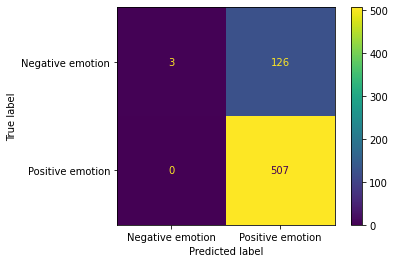

In [19]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(log_r, X_val_vec, y_val)

In [20]:
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

tfidf = TfidfVectorizer(token_pattern=r"([a-zA-Z]+(?:'[a-z]+)?)")
lr = LogisticRegression()
pipeline = make_pipeline(tfidf, lr)
pipeline

Pipeline(steps=[('tfidfvectorizer',
                 TfidfVectorizer(token_pattern="([a-zA-Z]+(?:'[a-z]+)?)")),
                ('logisticregression', LogisticRegression())])

In [21]:
cross_val_score(pipeline, X_train, y_train).mean()


0.8411328372754976

In [22]:
pipeline.fit(X_train, y_train)


Pipeline(steps=[('tfidfvectorizer',
                 TfidfVectorizer(token_pattern="([a-zA-Z]+(?:'[a-z]+)?)")),
                ('logisticregression', LogisticRegression())])

In [23]:
pipeline.score(X_test, y_test)
y_hat = pipeline.predict(X_test)

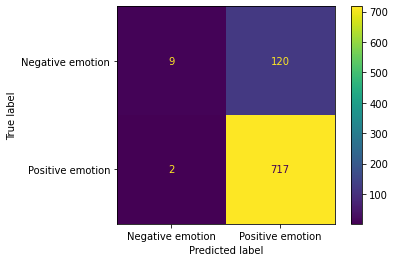

In [24]:
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(pipeline, X_test, y_test)

In [10]:
count_vectorizer = CountVectorizer()

count_vectorizer.fit(fifth_df['tweet_text'])

dict = count_vectorizer.vocabulary_.items()  

In [12]:
#complete train test split, pass original data into the TTS function
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

In [27]:
from nltk.corpus import stopwords
sw = stopwords.words('english')

In [16]:
import nltk
nltk.download()

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True

In [28]:
def stopwords(tweet_text):
    text = [word.lower() for word in tweet_text.split() if word.lower() not in sw]
    return " ".join(tweet_text)

In [29]:
fifth_df['tweet_text'] = fifth_df['tweet_text'].apply(stopwords)


In [30]:
fifth_df.head()

,tweet_text,company,emotion
0,. @ w e s l e y 8 3 I h a v e a 3 G ...,Apple,Negative emotion
1,@ j e s s e d e e K n o w a b o u t @ f ...,Apple,Positive emotion
2,@ s w o n d e r l i n C a n n o t w a i ...,Apple,Positive emotion
3,@ s x s w I h o p e t h i s y e a r ' ...,Apple,Negative emotion
4,@ s x t x s t a t e g r e a t s t u f f ...,Google,Positive emotion
